<a href="https://colab.research.google.com/github/Dannapaola1225/ejercicios1/blob/main/polinomio_interpolante_Mewton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#declaramos librerias a emplear
import numpy as np
import matplotlib.pyplot as plt
import sympy as syp
import scipy.special as spc
from math import *

In [8]:
def f(x):
    return -5+7*x-2*x**2+x**3

In [9]:
#formamos los arreglos
F =np.array([-5, 1, 9, 25, 55, 105])
X=np.array([0, 1, 2, 3, 4, 5,])

<function matplotlib.pyplot.show(close=None, block=None)>

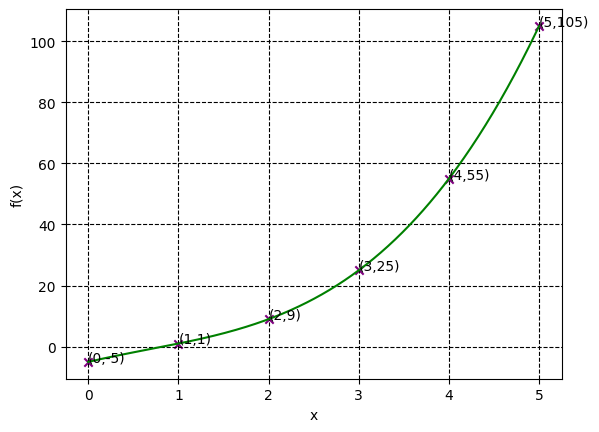

In [16]:
plt.scatter(X, F, marker= 'x', color="purple") # se grafican los datos de F con respecto a X
# Graficacion del polinomio y datos de la tabla
x1=np.linspace(0,5,1000) # se crea el rango del grafico
plt.grid(color="Black", linestyle= "--") # cuadricula
plt.plot(x1,f(x1), color="green") # se grafica el polinomio
plt.annotate('(0,-5)', (0, -5)) # punto 1
plt.annotate('(1,1)', (1, 1)) # punto 2
plt.annotate('(2,9)', (2, 9)) # punto 3
plt.annotate('(3,25)', (3, 25)) # punto 4
plt.annotate('(4,55)', (4, 55)) # punto 5
plt.annotate('(5,105)', (5, 105)) # punto 6
plt.xlabel("x") # rotulo
plt.ylabel("f(x)") # rotulo
plt.show # se muestra la grafica

In [18]:
print(f"X: {X}")
print(f"F: {F}")
D1 = np.diff(F) # primeras diferencias
print(f"Δ1: {D1}")
diferencias = [D1]

# diferencias sucesivas.

i = 2  # Contador para los arreglos D2, D3, etc.
DifI = D1

while True:
# Calcula la siguiente diferencia
    DifA = np.diff(DifI)  # se calculan las diferencias sucesivas
    diferencias.append(DifA)
    print(f"Δ{i}: {DifA}")

# Verifica si todos los elementos del arreglo actual son iguales
    if np.all(DifA == DifA[0]):  # se verifica si todos los elementos son iguales
        break

# Si no todos los elementos son iguales, actualiza el arreglo para la siguiente iteración
    DifI= DifA  # se actualiza el arreglo para la siguiente iteración
    i += 1  # se aumenta el contador para el siguiente arreglo

print("\nArreglos  generados:")
for idx, arr in enumerate(diferencias, start=1):
    print(f"Δ{idx}: {arr}")

X: [0 1 2 3 4 5]
F: [ -5   1   9  25  55 105]
Δ1: [ 6  8 16 30 50]
Δ2: [ 2  8 14 20]
Δ3: [6 6 6]

Arreglos  generados:
Δ1: [ 6  8 16 30 50]
Δ2: [ 2  8 14 20]
Δ3: [6 6 6]


In [28]:
def dif_d(x, F):
    n = len(x)
    # Crear una matriz
    t = np.zeros((n, n))
    t[:, 0] = F  # Colocar los valores de F(x) en la primera columna

    # Calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            t[i, j] = (t[i + 1, j - 1] - t[i, j - 1]) / (x[i + j] - x[i])

    return t

# Evaluación del polinomio de Newton en un valor x dado
def polinomio_newton(x_dado, x, t):
    n = len(x)
    resultado = t[0, 0]
    producto = 1
    for i in range(1, n):
        producto *= (x_dado - x[i - 1])
        resultado += t[0, i] * producto
    return resultado
#diferencias divididas
tabla = dif_d(X, F)
xi= 3
r= polinomio_newton(xi, X, tabla)
print(f"El  polinomio de Newton en x = {xi} es: {r}")

El  polinomio de Newton en x = 3 es: 25.0
